# Autproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

'year' is numerieke continue data. Met jaartallen kunnen wiskundige bewerkingen worden uitgevoerd, bovendien kan een jaartal elk mogelijk jaar zijn. 

'fuel type' is categorische data van het niet ordinale type. Er is geen volgorde of hierarchische onderverdeling bij deze data, het is louter beschrijvend. 

'seller_rating' is nummerieke discrete data. Het is een numerieke waarde gelimiteerd tussen 1 en 5.   


### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

In [1]:
import os
import pandas as pd


In [2]:
df = pd.read_csv("../../data/Cars/cars.csv")
# df.describe()
# df

# Filter het DataFrame op Volvo
df_volvo = df[df['manufacturer'] == 'Volvo']
# print(df_volvo)
# Bereken de gemiddelde prijs van de Volvo's
mean_price = round(df_volvo['price'].mean())

print(f"De gemiddelde prijs van een Volvo is: {mean_price}")

# De auto met de prijs het dichts bij de gemiddelde prijs is 
index_nearest_to_mean = (df_volvo['price'] - mean_price).abs().idxmin()

print(f"\n \nDe Volvo met een gemiddelde tweedehands prijs ziet er als volgt uit: \n\n{df_volvo.loc[index_nearest_to_mean]}")

De gemiddelde prijs van een Volvo is: 35800

 
De Volvo met een gemiddelde tweedehands prijs ziet er als volgt uit: 

manufacturer                             Volvo
model                         XC40 T4 Momentum
year                                      2021
mileage                                20089.0
engine                                 I-4 cyl
transmission                               NaN
drivetrain                   Front-wheel Drive
fuel_type                             Gasoline
mpg                                        NaN
exterior_color                     Black Stone
interior_color                             NaN
accidents_or_damage                        0.0
one_owner                                  1.0
personal_use_only                          0.0
seller_name            Volvo Cars of Nashville
seller_rating                              NaN
driver_rating                              4.7
driver_reviews_num                        35.0
price_drop                          

### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

In [3]:
import matplotlib.pyplot as plt
import plot_style 
plot_style.standard_setup()


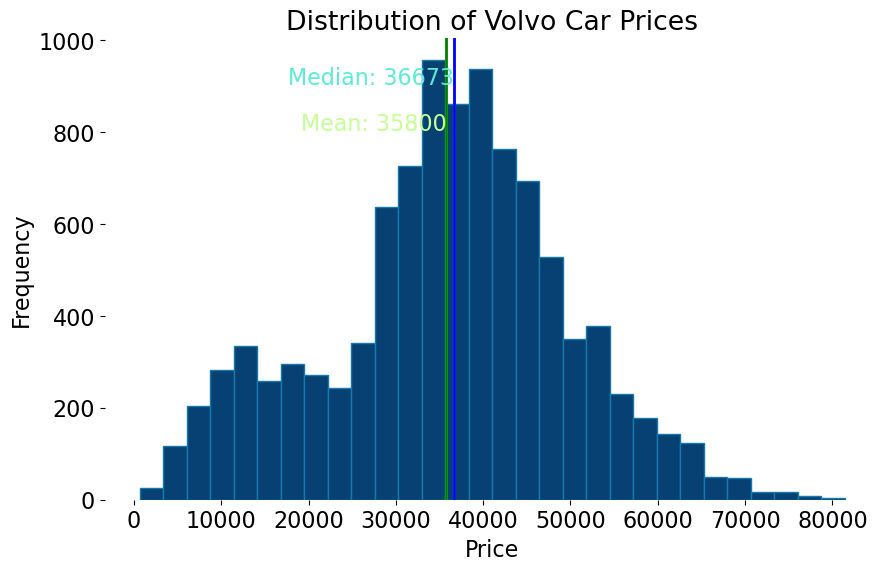

The range of prices for Volvo cars in the dataset is from 695.0 to 81400.0.


In [5]:
# load standard plot values and colors
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot a histogram of the prices of Volvo cars with red bars
ax.hist(df_volvo['price'], bins=30,  color=plot_style.hist_color, edgecolor=plot_style.hist_edgecolor)

# Calculate the median and mean prices
median_price = df_volvo['price'].median()
mean_price = df_volvo['price'].mean()

# Add vertical lines for the median and mean prices
ax.axvline(median_price, color=plot_style.median_color,  linewidth=2, label=f'Median: {median_price}')
ax.axvline(mean_price, color=plot_style.mean_color, linewidth=2, label=f'Mean: {mean_price}')

# Calculate the median and mean prices
median_price = df_volvo['price'].median()
mean_price = df_volvo['price'].mean()

# Add vertical lines for the median and mean prices
ax.axvline(median_price, color='blue',  linewidth=2)
ax.axvline(mean_price, color='green', linewidth=2)

# Add labels for the median and mean prices
ax.text(median_price, ax.get_ylim()[1]*0.9, f'Median: {round(median_price)}', color=plot_style.median_color, ha='left')
ax.text(mean_price, ax.get_ylim()[1]*0.8, f'Mean: {round(mean_price)}', color=plot_style.mean_color, ha='right')

# Set the title and labels
ax.set_title('Distribution of Volvo Car Prices')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Remove the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove the grid lines
ax.grid(False)

# Display the plot
plt.show()

# Calculate the minimum and maximum prices
min_price = df_volvo['price'].min()
max_price = df_volvo['price'].max()

# Print the range of prices
print(f'The range of prices for Volvo cars in the dataset is from {min_price} to {max_price}.')

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?
![alt text](image-1.png)

### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?